## Importing the libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt
%matplotlib inline

#import scipy.stats.stats as st #for skewness and kurtosis 

Informacion acerca de la base de datos
nombre:
- 0 : metformina -->
- 1 : linagliptina/metformina
* En esta base de datos solo contiene la matriz de abundancia de cada muestra en total n= 205 .
* además contiene la etiqueta del tratamiento médico codificado en 0 y 1
* los datos clinicos y paraclinicos fueron apartados en esta base de datos de forma manual en excel... incluyendo la fecha de toma de muestra 0, 6 y 12 meses


## Importing the dataset

In [2]:
df = pd.read_csv('-final_12metforminacontralina.csv', index_col=0) # se importa la base de datos en formato pd.dataframe
# index_col=0 simply means we'll treat the first column of the dataset as the ID column.

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# se separa la base de datos en variables dependientes como X y variables independientes como Y


In [3]:
df
### Unassigned;__;__;__;__;_ ¿¿_
# se visualiza la base de datos por completo
#205 rows= samples
# 450 columms = 1 etiqueta y 449 variables dependientes o predictoras

,Escherichia-Shigella,Collinsella,Agathobacter,Bacteroides,Blautia,Phascolarctobacterium,Prevotella 9,Akkermansia,Faecalibacterium,Methanobrevibacter,...,Deinococcus,Marinifilaceae,Actinobacteria,Selenomonadales,Victivallaceae_uncultured bacterium,Vermiphilaceae_uncultured bacterium,Bacteroidia,Methylobacterium,Propionimicrobium,status
index,,,,,,,,,,,,,,,,,,,,,
sample-106,765,6286,9212,12869,5817,1160,17,1292,2646,0,...,0,0,0,0,0,0,0,0,0,0
sample-109,1889,640,6049,4080,5328,123,6423,145,5860,0,...,0,0,0,0,0,0,0,0,0,0
sample-125,2585,0,506,7952,8787,378,3,0,10352,0,...,0,0,0,0,0,0,0,0,0,0
sample-127,1421,23728,4303,1534,12373,5836,4325,0,9529,0,...,0,0,0,0,0,0,0,0,0,0
sample-128,257,16947,3947,22,15698,14,145,0,1179,85,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample-89,27292,12,3016,60342,12285,6188,0,0,1283,0,...,0,0,0,0,0,0,0,0,0,1
sample-94,1721,2157,1540,16644,8110,22799,618,35686,3027,0,...,0,0,0,0,0,0,0,0,0,1
sample-97,37,2883,394,2398,15639,20,27,2083,3058,5,...,0,0,0,0,0,0,0,0,0,1


In [4]:
df.info()
#205 rows= samples
# 450 columms = 1 etiqueta y 449 variables dependientes o predictoras

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, sample-106 to sample-99
Columns: 450 entries, Escherichia-Shigella to status
dtypes: int64(450)
memory usage: 274.8+ KB


In [5]:
df.describe()
# descripcion estadistica de media, std, min, RIQ, max .... respecto a su abundancia

,Escherichia-Shigella,Collinsella,Agathobacter,Bacteroides,Blautia,Phascolarctobacterium,Prevotella 9,Akkermansia,Faecalibacterium,Methanobrevibacter,...,Deinococcus,Marinifilaceae,Actinobacteria,Selenomonadales,Victivallaceae_uncultured bacterium,Vermiphilaceae_uncultured bacterium,Bacteroidia,Methylobacterium,Propionimicrobium,status
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,...,78.0,78.0,78.0,78.0,78.000000,78.000000,78.0,78.0,78.0,78.000000
mean,4678.551282,5762.884615,4025.948718,8740.000000,7067.576923,3071.743590,3223.474359,2529.358974,5500.820513,1696.576923,...,0.0,0.0,0.0,0.0,0.025641,0.025641,0.0,0.0,0.0,0.525641
std,7525.901204,6062.621055,4847.429306,12532.679902,4875.860189,5792.642639,9317.761257,5776.098771,5474.261000,4963.809206,...,0.0,0.0,0.0,0.0,0.226455,0.226455,0.0,0.0,0.0,0.502574
min,6.000000,0.000000,0.000000,22.000000,334.000000,0.000000,0.000000,0.000000,161.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,337.750000,1428.500000,783.500000,716.250000,3145.000000,110.250000,0.000000,3.250000,1836.750000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,1429.500000,4047.500000,2722.500000,3044.500000,6126.000000,599.000000,190.500000,86.000000,3244.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.000000
75%,5975.750000,8868.000000,5747.250000,13524.500000,9257.250000,3453.000000,1726.750000,1438.250000,8843.750000,7.750000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.000000
max,42846.000000,30175.000000,30465.000000,61690.000000,21248.000000,35418.000000,72404.000000,35686.000000,26272.000000,23093.000000,...,0.0,0.0,0.0,0.0,2.000000,2.000000,0.0,0.0,0.0,1.000000


In [6]:
y

index
sample-106    0
sample-109    0
sample-125    0
sample-127    0
sample-128    0
             ..
sample-89     1
sample-94     1
sample-97     1
sample-98     1
sample-99     1
Name: status, Length: 78, dtype: int64

 # Data visualization - Bar Plot and others ..

 Bar plots help you visualize the distributions of categorical variables.



Number of patients with Metofrmina: 37
Number of patients with Linagliptina+Metformina treatment: 41


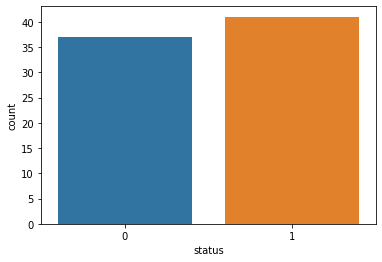

In [7]:
sns.countplot(x='status', data=df)

# Rotate x-labels
#plt.xticks(rotation=-45)

y_count = df['status'].value_counts()
print('Number of patients with Metofrmina:', y_count[0])
print('Number of patients with Linagliptina+Metformina treatment:', y_count[1])

<AxesSubplot:ylabel='index'>

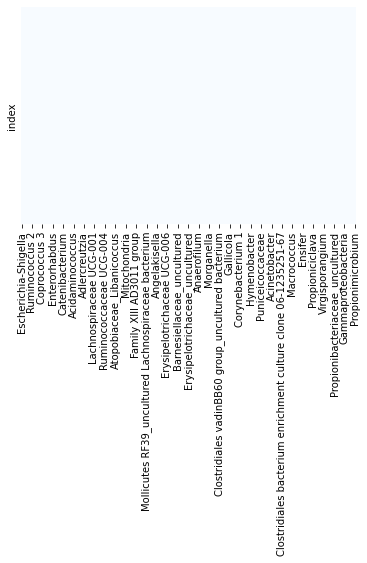

In [8]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
# 0 no es igual a faltante

In [9]:
#correlations = df.corr()
#f, ax = plt.subplots(figsize = (20, 20))
#sns.heatmap(correlations, annot = True)

## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# se divide la base de datos en un set de entrenamiento... en donde entrenaras a tu modelo a predecir
# y un set de prueba.. son datos que previamente no habian sido vistos por tu modelo, para valorar su performance

In [11]:
X_train.shape

(58, 449)

In [12]:
X_train

,Escherichia-Shigella,Collinsella,Agathobacter,Bacteroides,Blautia,Phascolarctobacterium,Prevotella 9,Akkermansia,Faecalibacterium,Methanobrevibacter,...,Pseudoramibacter,Deinococcus,Marinifilaceae,Actinobacteria,Selenomonadales,Victivallaceae_uncultured bacterium,Vermiphilaceae_uncultured bacterium,Bacteroidia,Methylobacterium,Propionimicrobium
index,,,,,,,,,,,,,,,,,,,,,
sample-33,24,2531,550,1808,3359,195,4,315,1333,0,...,0,0,0,0,0,0,0,0,0,0
sample-26,129,862,5835,2686,8753,108,6,17331,23182,0,...,0,0,0,0,0,0,0,0,0,0
sample-32,236,163,4923,33926,3229,1261,6,949,19338,0,...,0,0,0,0,0,0,0,0,0,0
sample-99,905,4914,1241,1781,2529,125,2340,10,10804,8990,...,0,0,0,0,0,0,0,0,0,0
sample-55,1321,7971,59,504,4667,415,87,49,1029,0,...,0,0,0,0,0,2,0,0,0,0
sample-157,1205,27,23071,17213,8573,27,0,0,9157,0,...,0,0,0,0,0,0,0,0,0,0
sample-61,1270,5235,2340,3925,10392,4695,630,1487,2642,5,...,0,0,0,0,0,0,0,0,0,0
sample-66,67,213,2500,1527,4651,5502,10925,0,2857,17,...,0,0,0,0,0,0,0,0,0,0
sample-131,1253,7686,298,11325,3244,27,1913,7076,1461,1166,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_test.shape

(20, 449)

In [14]:
X_train.shape

(58, 449)

## Normalization 

In [15]:
#X_train = np.log2(X_train + 0.5)
#X_test = np.log2(X_test + 0.5)

## Training the Random Forest model on the Training set

In [16]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000,
                               criterion = 'entropy',
                               random_state=0, 
                               max_features= 'sqrt',
                               n_jobs=-1, verbose = 1)

classifier.fit(X_train, y_train) 


#cambiar hiperparámetros ..



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.7s finished


RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=1000, n_jobs=-1, random_state=0, verbose=1)

In [17]:
y_pred = classifier.predict(X_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.0s finished


In [18]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')



Mean Absolute Error: 0.15 degrees.


## Making the Confusion Matrix

In [19]:

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 7  1]
 [ 2 10]]


0.85

<AxesSubplot:>

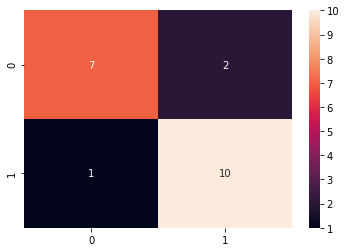

In [20]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [21]:
print('Accuracy is:', accuracy_score(y_test, y_pred))





Accuracy is: 0.85


## How to create a ROC curve

In [22]:
import seaborn as sns  # data visualization library  


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.0s finished


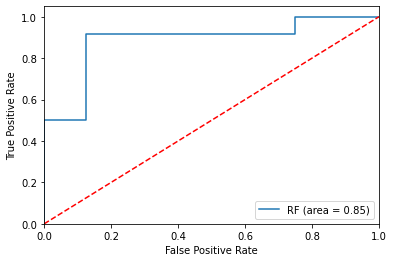

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.91      0.83      0.87        12

    accuracy                           0.85        20
   macro avg       0.84      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



In [25]:
#from sklearn.model_selection import cross_val_score
#accuracies = cross_val_score(estimator = clf_1, X = X_train, y = y_train, cv = 10)
#print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
#print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

#.2f -> two decimals before the pint




## Applying Cross Validation

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv, n_jobs=-1)



print('Mean accuracy: %.3f' % mean(scores))
print("Standard Deviation accuracy: {:.2f} %".format(scores.std()*100))

Mean accuracy: 0.688
Standard Deviation accuracy: 10.70 %


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC with CV: %.3f' % mean(scores))
print("Standard Deviation roc auc: {:.2f} %".format(scores.std()))


Mean ROC AUC with CV: 0.742
Standard Deviation roc auc: 0.09 %


In [28]:
#from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
from scipy import interp
from sklearn.metrics import roc_curve, auc
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

#cv = StratifiedKFold(n_splits=10,shuffle=False)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.0s finished
<ipython-input-29-6367600a48db>:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
[Paralle

[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.0s finished
<ipython-input-29-6367600a48db>:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.2s
[Paralle

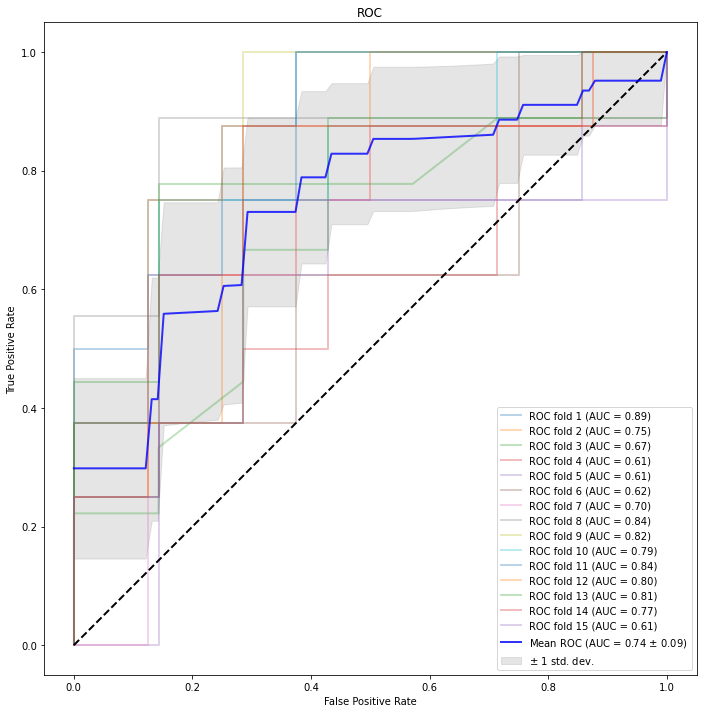

In [29]:

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
    
      
for train_index, test_index in cv.split(X, y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]  
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]    
    prediction = classifier.fit(X_train,y_train).predict_proba(X_test)
    fpr, tpr, t = roc_curve(y_test, prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)


std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

plt.show()

In [30]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE


In [31]:
#kf = StratifiedKFold(n_splits=10,shuffle=True, random_state=16)
kf= RepeatedStratifiedKFold(n_splits=5, n_repeats=1,random_state=65)
cvscores = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
Scores1 = []
Scores2 = []

<Figure size 720x720 with 0 Axes>

In [32]:
X= X.values
y= y.values

In [33]:
for fold, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    sm = SMOTE(random_state = 30)
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
   # sm = SMOTETomek(random_state=12)
   # X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    model = RandomForestClassifier(n_estimators=1000,
                               criterion = 'entropy',
                               random_state=0, 
                               max_features= 'sqrt',
                               n_jobs=-1, verbose = 1)  # Choose a model here
    model.fit(X_train_oversampled, y_train_oversampled )  
    y_pred = model.predict(X_test)
    #    print(f'For fold {fold}:')
#    print(f'Accuracy: {model.score(X_test, y_test)}')
#    print(f'AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1])}')
    Scores1.append(model.score(X_test, y_test))
    Scores2.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elaps

In [34]:
import statistics
print('Mean Accuracy with CV: %.3f' % mean(Scores1))
print('Standard Deviation accuracy: %.3f' % statistics.stdev(Scores1))

Mean Accuracy with CV: 0.693
Standard Deviation accuracy: 0.090


In [35]:
print('Mean AUC ROC with CV: %.3f' % mean(Scores2))
print('Standard Deviation AUC ROC: %.3f' % statistics.stdev(Scores2))

Mean AUC ROC with CV: 0.727
Standard Deviation AUC ROC: 0.101


In [36]:
col = df.columns       
drop_cols = ['status']
features= df.drop(drop_cols,axis = 1 )
feature_list = list(features.columns)

In [37]:
X_train = pd.DataFrame(X_train, columns= feature_list)
X_test = pd.DataFrame(X_test, columns= feature_list)

In [38]:
import shap


In [39]:
explainer = shap.TreeExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)

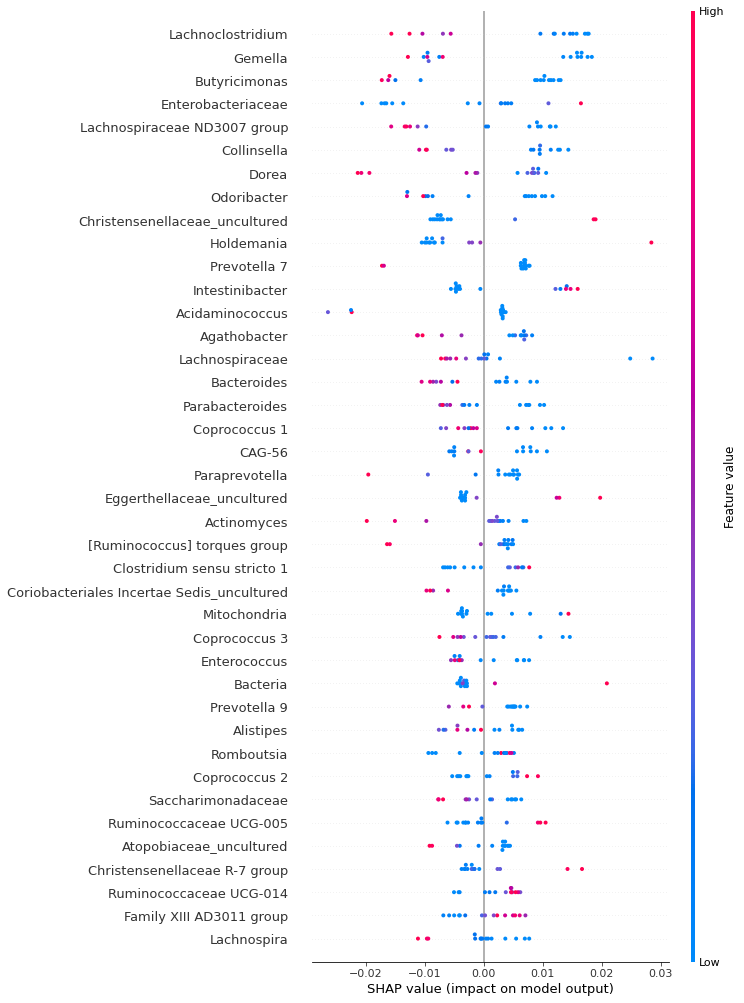

In [40]:
shap.summary_plot(shap_values[1], X_test, max_display=40)
# 0 metformina
# 1 lina + metformina 

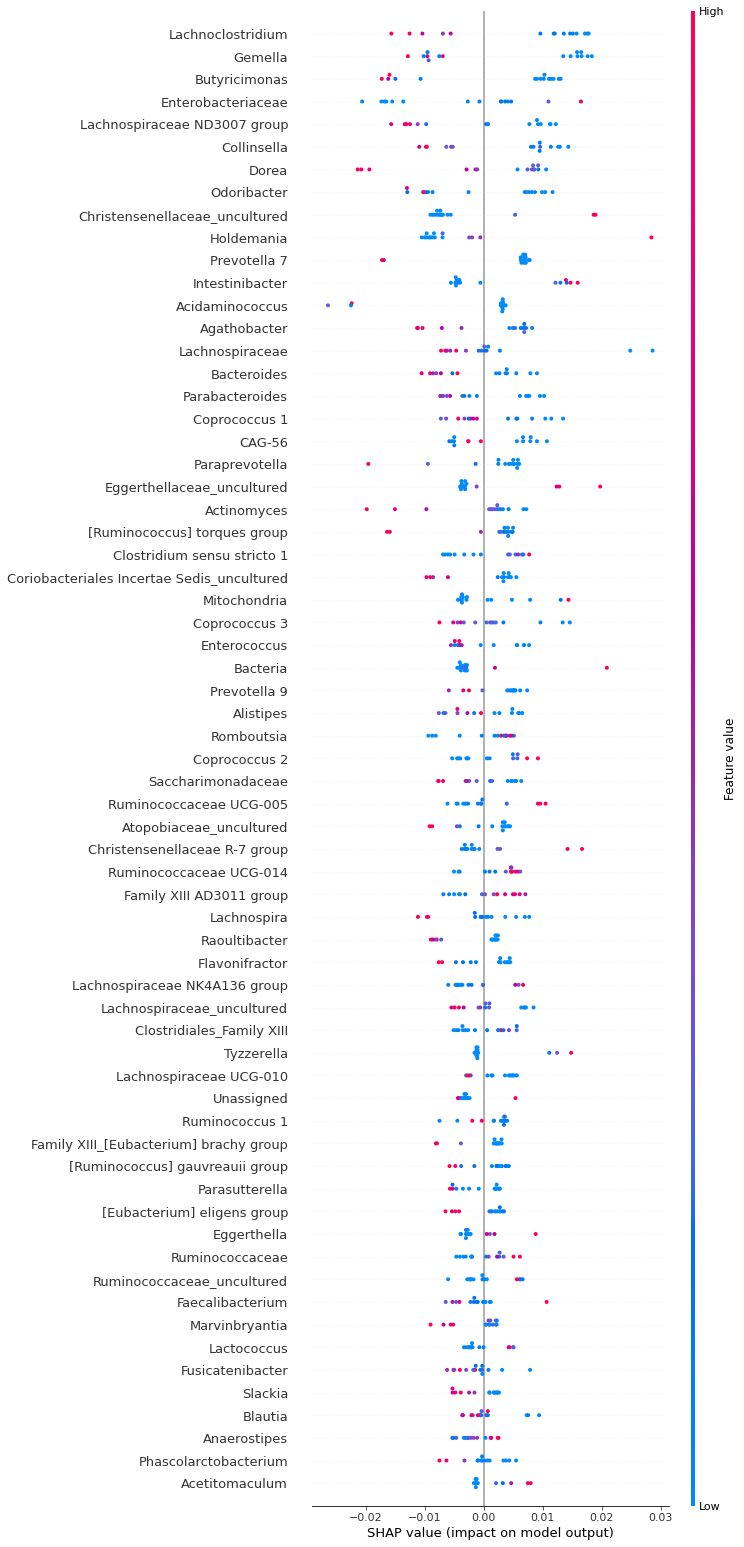

In [50]:
fig= shap.summary_plot(shap_values[1], X_test, max_display=65, show=False)
plt.savefig("(0)Metformina12meses_vs_(1)Linagliptina-a12meses.png", format="png", dpi=300, bbox_inches='tight')
plt.show()

In [52]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(features.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
feature_importance.head(65)
list_1 = feature_importance.head(65)
list_1.to_csv('List_feature_importance_(0)Metformina12meses_vs_(1)Linagliptina-a12meses.csv')

In [43]:
# Get numerical feature importances
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Enterobacteriaceae   Importance: 0.02
Variable: Holdemania           Importance: 0.02
Variable: Escherichia-Shigella Importance: 0.01
Variable: Collinsella          Importance: 0.01
Variable: Agathobacter         Importance: 0.01
Variable: Bacteroides          Importance: 0.01
Variable: Blautia              Importance: 0.01
Variable: Phascolarctobacterium Importance: 0.01
Variable: Prevotella 9         Importance: 0.01
Variable: Akkermansia          Importance: 0.01
Variable: Faecalibacterium     Importance: 0.01
Variable: Subdoligranulum      Importance: 0.01
Variable: Dorea                Importance: 0.01
Variable: Christensenellaceae R-7 group Importance: 0.01
Variable: Fusicatenibacter     Importance: 0.01
Variable: Streptococcus        Importance: 0.01
Variable: [Eubacterium] hallii group Importance: 0.01
Variable: Ruminococcus 1       Importance: 0.01
Variable: Veillonella          Importance: 0.01
Variable: Anaerostipes         Importance: 0.01
Variable: [Ruminococcus]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

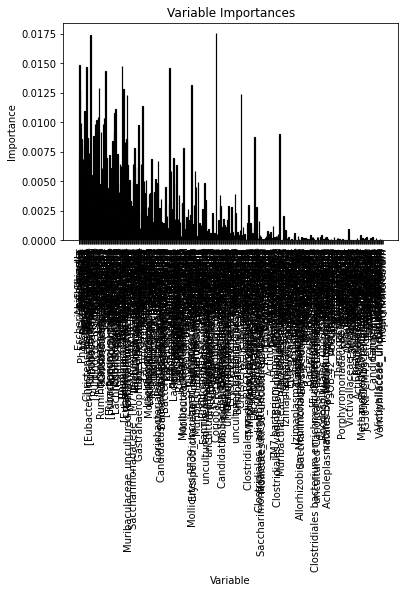

In [45]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

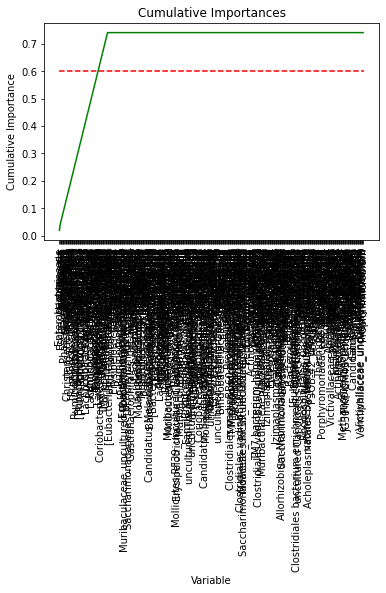

In [46]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.60, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [49]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
cum = np.where(cumulative_importances > 0.70)[0][0] + 1
print('Number of features for 95% importance:', cum)

Number of features for 95% importance: 68


## OPTIMIZE RANDOM FOREST HYPERPARAMETERS BY PERFORMING GRID SEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [20, 40, 80, 90, 100, 110],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [3, 4, 5, 6, 7],
    'min_samples_split': [8, 10, 12, 14],
    'n_estimators': [50, 100, 200, 300, 1000, 2000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [ ]:
grid_search.best_params_


In [ ]:
best_grid = grid_search.best_estimator_


In [ ]:
Y_pred= best_grid.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, Y_pred)
print(cm)
accuracy_score(y_test, Y_pred)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, .predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, best_grid.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
scores = cross_val_score(best_grid, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC with CV: %.3f' % mean(scores))
print("Standard Deviation roc auc: {:.2f} %".format(scores.std()*100))


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scores = cross_val_score(best_grid, X, y, scoring='accuracy', cv=cv, n_jobs=-1)



print('Mean accuracy: %.3f' % mean(scores))
print("Standard Deviation accuracy: {:.2f} %".format(scores.std()*100))

In [ ]:
drop_cols = ['treatment']
features= df.drop(drop_cols,axis = 1 )
feature_list = list(features.columns)

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
perm = PermutationImportance(best_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = feature_list)

In [ ]:
import shap



In [ ]:
from matplotlib import pyplot as plt
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

In [ ]:
X_test

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")



In [ ]:
shap.summary_plot(shap_values[1], X_test)
# 0 metformina
# 1 lina + metformina 

# usar solo 20 - hacer el árbol 
# los puntos no son los pacientes en sí..... 
#shap value positivo - clasificando metformina

In [ ]:
df.iloc[:, 38]

In [ ]:
df.iloc[:, 67]

In [ ]:
df.iloc[:, 67]

In [ ]:
df.iloc[:, 35]

In [ ]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

### how to get columns names ?


In [ ]:
cols = df.columns 
cols

In [ ]:
df_features = df.drop(labels='treatment', axis=1) #

In [ ]:
x1 = df_features.columns.values
x1

In [ ]:
drop_cols = ['treatment']
df_X = df.drop(drop_cols, axis= 1)
cont_names = df_X.columns

In [ ]:
cont_names = cont_names.values.tolist()

In [ ]:
classifier.fit(X_train, y_train)
# Extract single tree
estimator = classifier.estimators_[5]
estimator

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='rf_Lina.dot', 
                feature_names = cont_names,
                class_names = ['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)



In [ ]:
from IPython.display import Image
from subprocess import call

# Convert to png
call(['dot', '-Tpng', 'rf_Lina.dot', '-o', 'rf_Lina.png', '-Gdpi=200'])

# Visualize
Image(filename='rf_Lina.png')

In [ ]:
!pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz


In [ ]:
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [ ]:
dep_var = ['treatment']


In [ ]:
drop_cols = ['treatment']
df_X = df.drop(drop_cols, axis= 1)
cont_names = df_X.columns

In [ ]:
cont_names = cont_names.values.tolist()

In [ ]:
splits = RandomSplitter(valid_pct=0.25)(range_of(df))

In [ ]:
to = TabularPandas(df,
                   cont_names = cont_names,
                   y_names='treatment',
                   y_block = CategoryBlock,
                   splits=splits)

In [ ]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
m = DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=1537364731)
m.fit(xs, y)

In [ ]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(estimator, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

In [ ]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(estimator, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        show_node_labels = True)



At each node, we can see a stacked histogram of the feature that is used for splitting the observations, colored by class. This way, we can see how the classes are segregated by each split. The small triangle with the value at the x-axis is the splitting point

The left branches of the tree indicate selecting the values larger or equal to the splitting value, while the right one lesser than the splitting value. 

In [ ]:
def feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [ ]:
fi = feat_importance(m, xs)
fi[:10]

In [ ]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(24,14), legend=False)

plot_fi(fi[:30]);

In [ ]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

In [ ]:
to_keep.values

In [ ]:
impo =['k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Ruminococcus',
       'k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Akkermansia',
       'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Anaerostipes', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__;g__',
       'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Anaerotruncus',
       'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Lachnospira', 'k__Bacteria;p__Tenericutes;c__Mollicutes;o__RF39;f__;g__',
       'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Coprococcus',
       'k__Bacteria;p__Synergistetes;c__Synergistia;o__Synergistales;f__Synergistaceae;g__Cloacibacillus', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__[Tissierellaceae];g__1-68',
       'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__[Tissierellaceae];g__Peptoniphilus',
       'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Butyricicoccus', 'k__Bacteria;p__TM7;c__TM7-3;o__CW040;f__;g__',
       'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus', 'k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o__Erysipelotrichales;f__Erysipelotrichaceae;g__',
       'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__[Tissierellaceae];g__Parvimonas', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella',
       'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__S24-7;g__', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Veillonellaceae;g__Dialister']

In [ ]:
xs_imp=xs[impo]
valid_xs_imp = valid_xs[impo]

In [ ]:
xs_imp

In [ ]:
y.shape

In [ ]:
classifier.fit(xs_imp, y)

In [ ]:
y_pred_1 = classifier.predict(valid_xs_imp)
cm = confusion_matrix(valid_y, y_pred_1)
print(cm)
accuracy_score(valid_y, y_pred_1)